<a href="https://colab.research.google.com/github/Apolinar97/Apolinar97.github.io/blob/main/linearRegressionCoronaBeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



In [5]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


In [ ]:
# downloaded = drive.CreateFile({'id':'1CZl37BtGUzMLUzjq3RDc9kr9zEg4fcIr'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('coroData.csv') 


In [14]:
df = pd.read_csv("/corodata.csv")
#Reverse order of df
df = df.iloc[::-1]
#convert to datetime 
df['Date'] = pd.to_datetime(df['Date'])
#convert datetime to ordinal

df['Date'] = df['Date'].map(dt.datetime.toordinal)

dates = df.iloc[:, :-1].values
cases = df.iloc[:, 1].values



In [15]:
date_train, date_test, case_train, case_test = train_test_split(dates,cases,test_size=1/5,random_state=0)

regressor = LinearRegression()
regressor.fit(date_train,case_train)


LinearRegression()

In [16]:
print("Intercept=", regressor.intercept_)
# Retrieve the slope:
print("Slope=", regressor.coef_)
print("Score=", regressor.score)

Intercept= -2369914660.277955
Slope= [3213.66177082]
Score= <bound method RegressorMixin.score of LinearRegression()>


In [18]:
case_predict = regressor.predict(date_test)

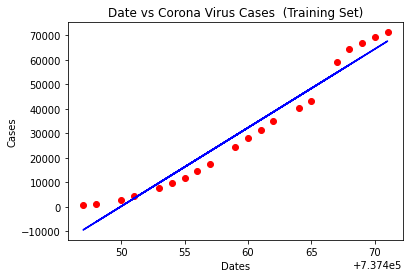

In [19]:
#Visulize the training results:
plt.scatter(date_train, case_train, color = 'red')
plt.plot(date_train, regressor.predict(date_train), color = 'blue')
plt.title('Date vs Corona Virus Cases  (Training Set)')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

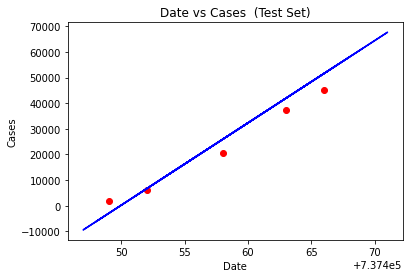

In [20]:
plt.scatter(date_test, case_test, color = 'red')
plt.plot(date_train, regressor.predict(date_train), color = 'blue')
plt.title('Date vs Cases  (Test Set)')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [21]:
dates


array([[737447],
       [737448],
       [737449],
       [737450],
       [737451],
       [737452],
       [737453],
       [737454],
       [737455],
       [737456],
       [737457],
       [737458],
       [737459],
       [737460],
       [737461],
       [737462],
       [737463],
       [737464],
       [737465],
       [737466],
       [737467],
       [737468],
       [737469],
       [737470],
       [737471]])

In [22]:
#737471 = 02/16/2020
#737476 = 2/24/2020
case_feb24= regressor.predict([[737479]])
case_feb19 = regressor.predict([[737474]])
case_feb17= regressor.predict([[737472]])

print(case_feb24)

print(f"Predicted cases for 02/17/2020:{case_feb17} ")
print(f"Predicted cases for 02/19/2020:{case_feb19} ")
print(f"Predicted cases for 02/24/2020:{case_feb24} ")


[93408.80379677]
Predicted cases for 02/17/2020:[70913.17140102] 
Predicted cases for 02/19/2020:[77340.49494267] 
Predicted cases for 02/24/2020:[93408.80379677] 


In [23]:
case_19_percent_error = (75700 - case_feb19)/75700
print(f"The percent error for Feb. 19 case prediction is: {abs(case_19_percent_error*100)}")

The percent error for Feb. 19 case prediction is: [2.16710032]
